In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [34]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_df.shape

(891, 12)

In [37]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


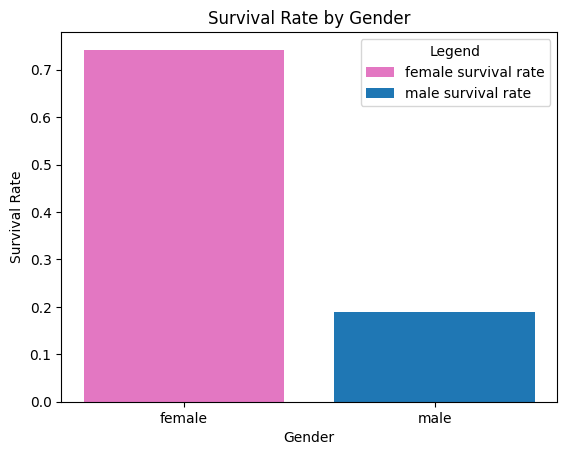

In [38]:
survival_rate = train_df.groupby('Sex')['Survived'].mean()

fig, ax = plt.subplots()

gender = survival_rate.index.tolist()
survived = survival_rate.values.tolist()

bar_labels = ['female survival rate', 'male survival rate']
bar_colors = ['tab:pink', 'tab:blue']

ax.bar(gender, survived, label=bar_labels, color=bar_colors)
ax.set_xlabel('Gender')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Gender')
ax.legend(title='Legend')

plt.show()

In [39]:
survival_rate = train_df.groupby('Pclass')['Survived'].mean()
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

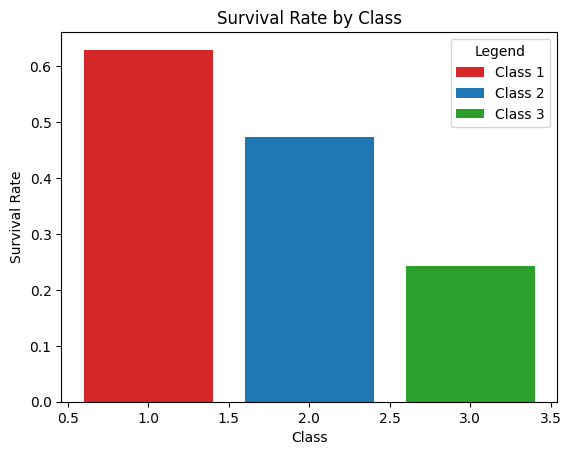

In [40]:
survival_rate = train_df.groupby('Pclass')['Survived'].mean()

fig, ax = plt.subplots()

Class = survival_rate.index.tolist()
survived = survival_rate.values.tolist()

bar_labels = ['Class 1', 'Class 2', 'Class 3']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(Class, survived, label=bar_labels, color=bar_colors)
ax.set_xlabel('Class')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Class')
ax.legend(title='Legend')

plt.show()

In [41]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare']  = test_df['Fare'].fillna(test_df['Fare'].median())

In [43]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mode()[0])
test_df['Age']  = test_df['Age'].fillna(test_df['Age'].mode()[0])

In [44]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked']  = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

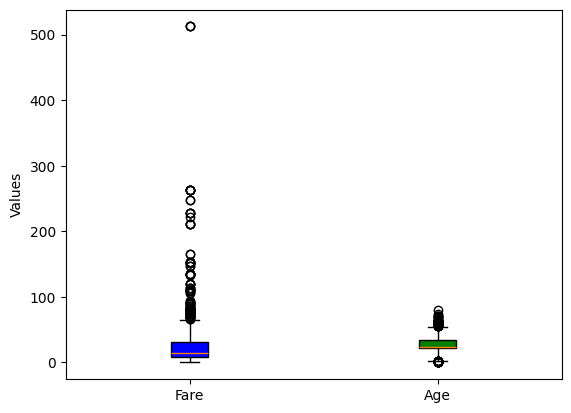

In [45]:
features = [train_df['Fare'], train_df['Age']]
labels = ['Fare', 'Age']
colors = ['blue', 'green']

fig, ax = plt.subplots()
ax.set_ylabel('Values')

bplot = ax.boxplot(features,patch_artist=True,tick_labels=labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [46]:
def remove_fare_outliers(df, name="DF"):
    df_copy = df.copy()
    fare_values = df_copy[['Fare']].values
    kmeans = KMeans(n_clusters=5, random_state=0).fit(fare_values)
    dists = np.linalg.norm(fare_values - kmeans.cluster_centers_[kmeans.labels_], axis=1)
    threshold = np.percentile(dists, 99.9)
    mask = dists < threshold
    num_outliers = np.sum(~mask)
    print(f"{name}: Outliers removed = {num_outliers}")
    return df_copy[mask]

train_df = remove_fare_outliers(train_df, name="Train Data")

Train Data: Outliers removed = 2


In [47]:
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [48]:
def encode_sex(df):
    df_copy = df.copy()
    df_copy['Sex'] = df_copy['Sex'].map({'female': 1, 'male': 2})
    return df_copy

train_df = encode_sex(train_df)
test_df = encode_sex(test_df)

In [49]:
train_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [50]:
def encode_embarked(df):
    df_copy = df.copy()
    df_copy['Embarked'] = df_copy['Embarked'].map({'C': 1, 'S': 3, 'Q': 2})
    return df_copy

train_df = encode_embarked(train_df)
test_df = encode_embarked(test_df)

In [51]:
def encode_title(df):
    df_copy = df.copy()
    
    df_copy['Title'] = df_copy['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
    
    title_mapping = {
        'Mrs': 1, 'Miss': 1, 'Mme': 1, 'Ms': 1, 'Mlle': 1, 'Lady': 1, 'Countess': 1,
        'Mr': 3, 'Master': 3, 'Don': 3, 'Sir': 3, 'Jonkheer': 3,
        'Capt': 2, 'Col': 2, 'Major': 2, 'Rev': 2, 'Dr': 2
    }
    
    df_copy['Title'] = df_copy['Title'].map(title_mapping).fillna(4).astype(int)
    
    return df_copy

train_df = encode_title(train_df)
test_df = encode_title(test_df)

In [52]:
train_df.groupby('Title')['Survived'].mean()

Title
1    0.739550
2    0.277778
3    0.187500
Name: Survived, dtype: float64

In [53]:
def drop_unnecessary_columns(df, is_train=True):
    df_copy = df.copy()
    common_cols = ['Cabin', 'Ticket', 'Name']
    train_only_cols = ['PassengerId'] if is_train else []
    cols_to_drop = common_cols + train_only_cols
    df_copy = df_copy.drop(columns=[col for col in cols_to_drop if col in df_copy.columns])
    return df_copy

train_df = drop_unnecessary_columns(train_df, is_train=True)
test_df = drop_unnecessary_columns(test_df, is_train=False)


In [54]:
def age_group(age):
    if age in range(0,15) :
        return 1
    elif age in range(16, 30) : 
        return 2
    elif age in range(30, 60) : 
        return 3
    else :
        return 4
    
train_df['AgeGroup'] = train_df['Age'].apply(age_group)
test_df['AgeGroup'] = test_df['Age'].apply(age_group)

In [55]:
def add_fare_group(df):
    df_copy = df.copy()
    
    q1 = df_copy['Fare'].quantile(0.25)
    q2 = df_copy['Fare'].quantile(0.50)
    q3 = df_copy['Fare'].quantile(0.75)
    
    df_copy['FareGroup'] = pd.cut(
        df_copy['Fare'],
        bins=[-1, q1, q2, q3, df_copy['Fare'].max()],
        labels=[4, 3, 2, 1]
    ).astype(int)
    
    return df_copy

train_df = add_fare_group(train_df)
test_df = add_fare_group(test_df)

In [56]:
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['FamilySize'] = test_df['Parch'] + test_df['SibSp'] + 1

In [57]:
def family_size(number):
    if number==1:
        return "2"
    elif number>1 and number <5:
        return "1"
    else:
        return "3"
    
train_df['FamilySizeGroup']=train_df['FamilySize'].apply(family_size)
test_df['FamilySizeGroup']=test_df['FamilySize'].apply(family_size)

In [58]:
import warnings
warnings.filterwarnings("ignore")

def interaction_features(df):
    df_copy = df.copy()
    cols = [c for c in df_copy.columns if c not in ["Survived", "PassengerId"]]
    df_num = df_copy[cols].apply(pd.to_numeric, errors='ignore')
    for col1, col2 in itertools.combinations(cols, 2):
        df_copy[f"{col1}*{col2}"] = df_num[col1] * df_num[col2]
    for col1, col2, col3 in itertools.combinations(cols, 3):
        df_copy[f"{col1}*{col2}*{col3}"] = (
            df_num[col1] * df_num[col2] * df_num[col3]
        )
    return df_copy
train_df = interaction_features(train_df)
test_df = interaction_features(test_df)

In [59]:
train_df.corr()['Survived'].sort_values(ascending=False)

Survived                     1.000000
Fare                         0.252177
Fare*FareGroup               0.243286
Fare*AgeGroup                0.242577
Fare*AgeGroup*FareGroup      0.222886
                               ...   
Pclass*Title                -0.537181
Sex*Title                   -0.539233
Pclass*Sex*Title            -0.540827
Sex                         -0.541585
Sex*Title*FamilySizeGroup   -0.544742
Name: Survived, Length: 299, dtype: float64

In [60]:
def anova(train_df, target='Survived', k=10):
    X_train = train_df.drop(target, axis=1)
    y_train = train_df[target]
    
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    selected_features = X_train.columns[selector.get_support()]
    
    train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
    train_selected[target] = y_train.values
    
    return train_selected, list(selected_features)

train_df, selected_features = anova(train_df, target='Survived', k=95)

In [61]:
train_df.corr()['Survived'].sort_values(ascending=False)

Survived                     1.000000
Fare                         0.252177
Fare*FareGroup               0.243286
Fare*AgeGroup                0.242577
Fare*AgeGroup*FareGroup      0.222886
                               ...   
Pclass*Title                -0.537181
Sex*Title                   -0.539233
Pclass*Sex*Title            -0.540827
Sex                         -0.541585
Sex*Title*FamilySizeGroup   -0.544742
Name: Survived, Length: 96, dtype: float64

In [62]:
def scale_age_fare(df):
    df_scaled = df.copy()
    cols = ['Age', 'Fare']
    existing = [c for c in cols if c in df.columns]
    if len(existing) == 2:
        pt = PowerTransformer(method='yeo-johnson', standardize=True)
        df_scaled[existing] = pt.fit_transform(df[existing])
    return df_scaled

train_df = scale_age_fare(train_df)
test_df = scale_age_fare(test_df)

In [63]:
df = train_df.copy()
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=90,
    max_depth=35,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1] 
print(f"Accuracy : {accuracy_score(y_val, y_pred):.4f}")

print("\nClassification Report : ")
print(classification_report(y_val, y_pred))


Accuracy : 0.8820

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       107
           1       0.87      0.83      0.85        71

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.88       178
weighted avg       0.88      0.88      0.88       178



In [64]:
test_df_final = test_df.copy()
test_X = test_df_final[X.columns]
test_predictions = rf.predict(test_X)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

submission.to_csv("data/submission.csv", index=False)